In [1]:
print("radha")

radha


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("placement_outlier.csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_23904\3253778634.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'],hist=False , color="blue")
C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_23904\3253778634.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

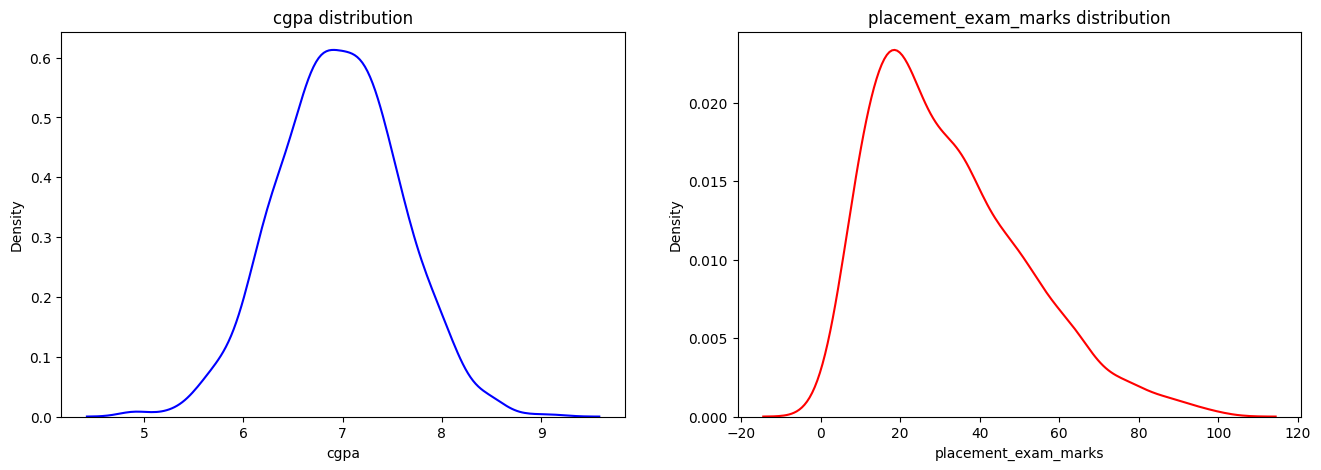

In [21]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(df['cgpa'],hist=False , color="blue")
plt.title("cgpa distribution")

plt.subplot(122)
sns.distplot(df.placement_exam_marks,hist=False,color="red")
plt.title("placement_exam_marks distribution")
plt.show()

In [22]:
df.placement_exam_marks.describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

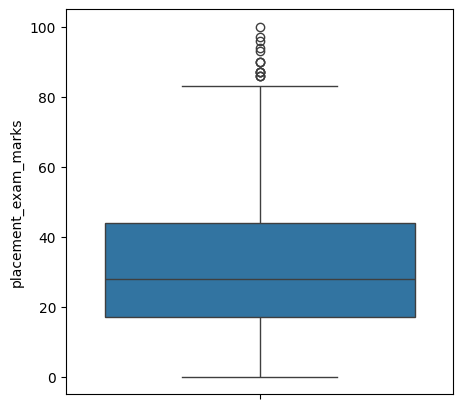

In [23]:
plt.figure(figsize=(5,5))
sns.boxplot(df['placement_exam_marks'])

In [24]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25) # Q1
percentile75 = df['placement_exam_marks'].quantile(0.75) # Q3
IQR = percentile75 - percentile25
IQR

np.float64(27.0)

In [26]:
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR
upper_limit,lower_limit

(np.float64(84.5), np.float64(-23.5))

In [33]:
df[(df['placement_exam_marks'] > upper_limit )]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [35]:
df[(df['placement_exam_marks'] < lower_limit )]

,cgpa,placement_exam_marks,placed


In [37]:
outliers = df[(df['placement_exam_marks'] > upper_limit ) | (df.placement_exam_marks < lower_limit)]

### **Trimming**

In [47]:
new_df = df.drop(outliers.index)
new_df.shape , df.shape ,outliers.shape

((985, 3), (1000, 3), (15, 3))

C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_23904\3426843016.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'],hist=False,color="blue")
C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_23904\3426843016.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

<Axes: ylabel='placement_exam_marks'>

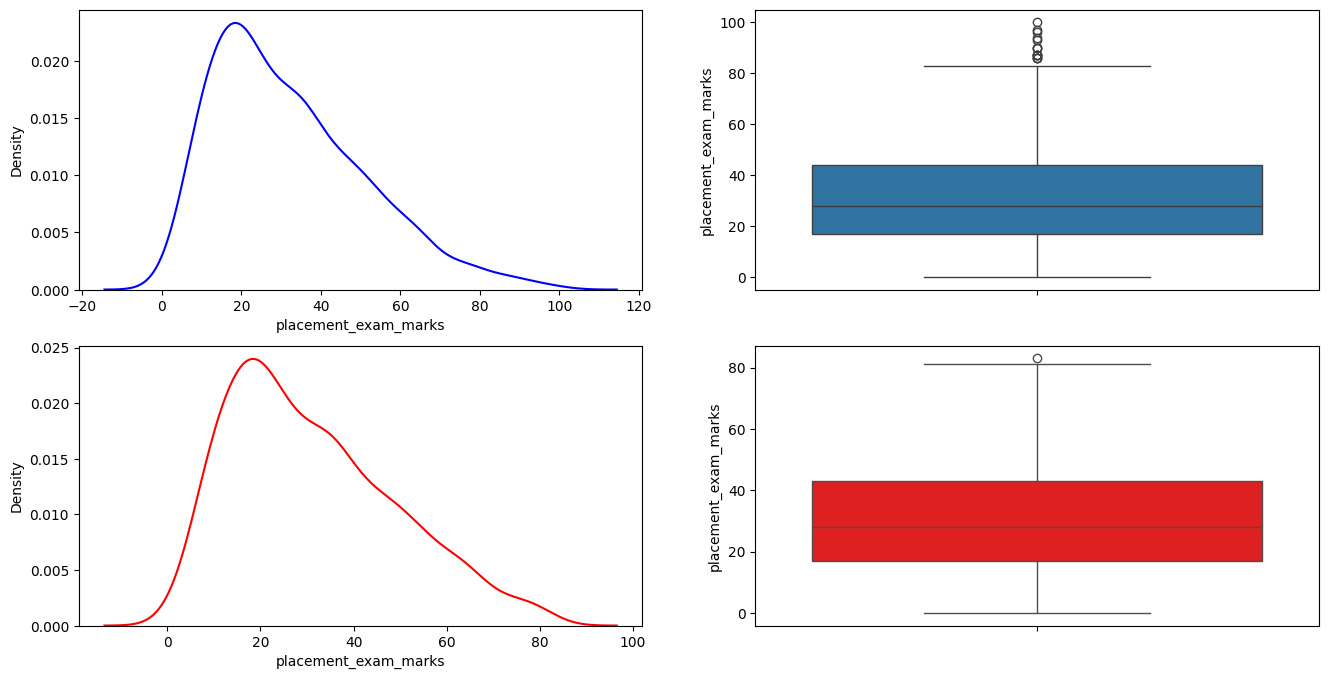

In [50]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'],hist=False,color="blue")

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df.placement_exam_marks,hist=False,color="red")

plt.subplot(224)
sns.boxplot(new_df.placement_exam_marks,color="red")

## **capping**

In [55]:
new_df_capped = df.copy()
new_df_capped['placement_exam_marks'] = np.where(
    new_df_capped['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_capped['placement_exam_marks'] < lower_limit , lower_limit,
        new_df_capped.placement_exam_marks
    )
)

In [58]:
new_df_capped[new_df_capped.placement_exam_marks > upper_limit]

,cgpa,placement_exam_marks,placed


In [59]:
new_df_capped[new_df_capped.placement_exam_marks < lower_limit]

,cgpa,placement_exam_marks,placed


C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_23904\875772665.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_23904\875772665.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_capped['placement_

<Axes: ylabel='placement_exam_marks'>

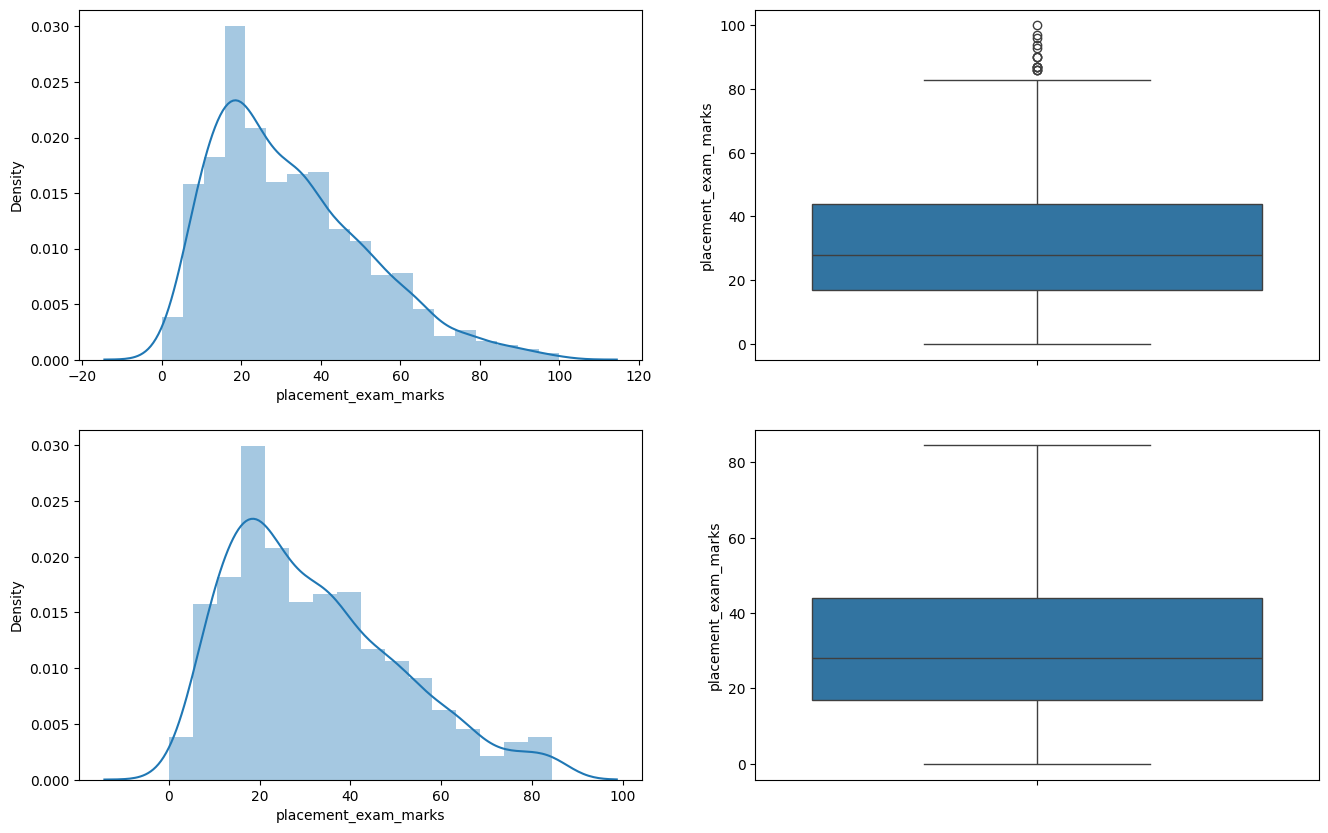

In [62]:
# comparing
plt.figure(figsize=(16,10))
plt.subplot(221)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_capped['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(new_df_capped['placement_exam_marks'])